In [29]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_DS_US=df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].copy()
df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])

In [30]:
df_DS_US = df_DS_US.explode('job_skills')


In [31]:
df_DS_US[['job_skills','salary_year_avg']]

,job_skills,salary_year_avg
100,sql,228222.0
100,r,228222.0
100,python,228222.0
100,express,228222.0
116,r,114000.0
...,...,...
785648,snowflake,221875.0
785648,spark,221875.0
785692,python,157500.0
785692,matlab,157500.0


In [32]:
df_DS_US_group = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

In [33]:
df_DS_top_pay = df_DS_US_group.sort_values(by='median',ascending=False).head(15)

In [34]:
df_DS_top_pay

,count,median
job_skills,,
asana,5,259000.00000
airtable,6,224250.00000
watson,10,213500.00000
unreal,4,211500.00000
ruby on rails,4,195500.00000
redhat,1,189500.00000
notion,9,187500.00000
slack,11,180000.00000
hugging face,15,179000.00000


In [35]:
df_DS_skills = df_DS_US_group.sort_values(by='count',ascending=False).head(15).sort_values(by='median',ascending=False)

In [36]:
df_DS_skills

,count,median
job_skills,,
pytorch,424,150000.0
tensorflow,474,149646.0
spark,718,135959.5
pandas,361,135000.0
sql,2463,134500.0
aws,768,134000.0
python,3358,131867.0
r,2053,126000.0
azure,461,126000.0


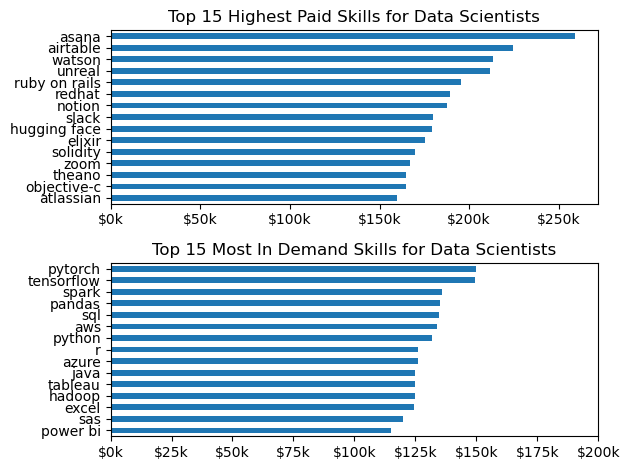

In [38]:
fig, ax = plt.subplots(2,1)
df_DS_top_pay.plot(kind='barh',y='median',ax=ax[0],legend=False)
df_DS_skills.plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top 15 Highest Paid Skills for Data Scientists')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}k'))
ax[1].invert_yaxis()
ax[1].set_title('Top 15 Most In Demand Skills for Data Scientists')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}k'))

plt.xlim(0,200000)

fig.tight_layout()